<a href="https://colab.research.google.com/github/hbaniowda/Prediction-of-Product-Sales/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_missing = ["Item_Weight","Outlet_Size"]
df_missing

['Item_Weight', 'Outlet_Size']

#Data Dictionary for this dataset:

1.Item_Identifier:	Product ID

2.Item_Weight:	Weight of product

3.Item_Fat_Content:	Whether the product is low-fat or regular

4.Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product

5.Item_Type:	The category to which the product belongs

6.Item_MRP:	Maximum Retail Price (list price) of the product

7.Outlet_Identifier:	Store ID

8.Outlet_Establishment_Year:	The year in which store was established

9.Outlet_Size:	The size of the store in terms of ground area covered

10.Outlet_Location_Type:	The type of area in which the store is located

11.Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket

12.Item_Outlet_Sales:	Sales of the product in the particular store. This is the target variable to be predicted.


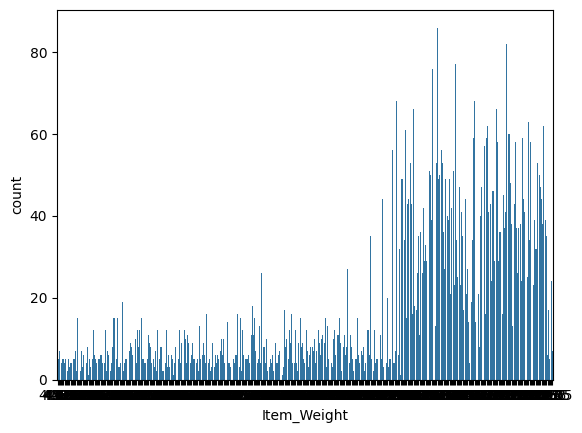

In [13]:
ax = sns.countplot(data=df, x="Item_Weight")

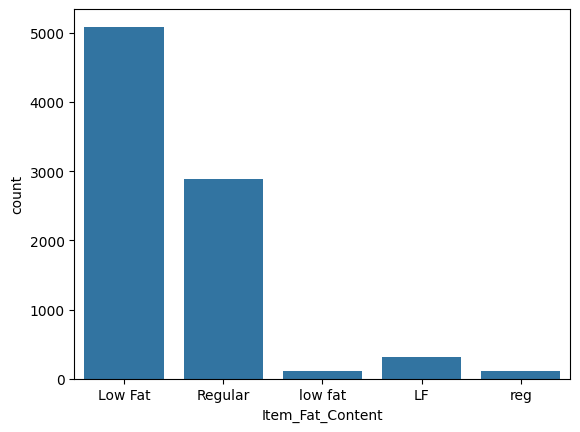

In [14]:
ax = sns.countplot(data=df, x="Item_Fat_Content")

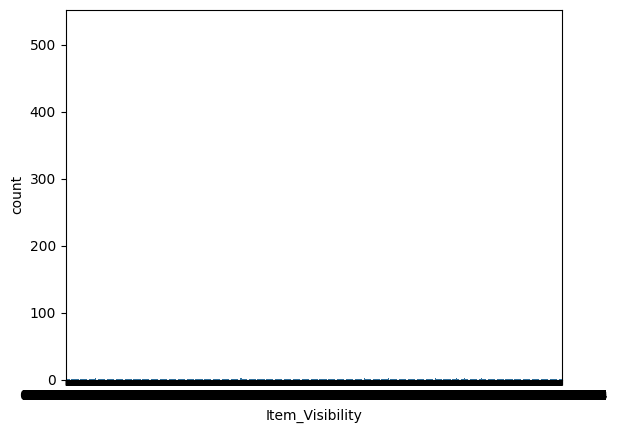

In [15]:
ax = sns.countplot(data=df, x="Item_Visibility")

<ipython-input-18-a772b47da1e9>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


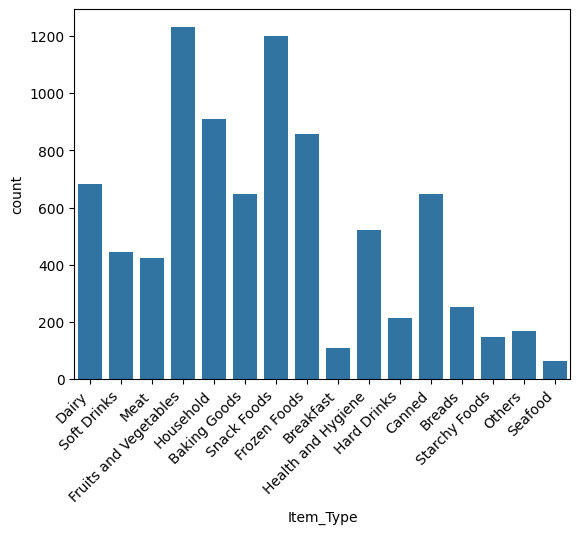

In [18]:
ax = sns.countplot(data=df, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [19]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#Answer the following questions from the Feature Inspection lesson in a markdown cell:

1.What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical (Item_Type, Outlet_Location_Type, Outlet_Type

- Numeric (Item_Weight, Item_Identifier, Item_Visibility, Item_MRP,Outlet_Identifier, Outlet_Establishment_Year, Item_Outlet_Sales

- Ordinal (Item_Fat_Content, , Outlet_Size

2.How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

-  Item_Weight                  1463
-  Outlet_Size                  2410

% are:
- Item_Weight                  17.165317
- Outlet_Size                  28.276428


We don't drop the row, however, we replace the null values in the Item weight  with the mean
and in the outlet size with the mode

In [21]:
df.isnull().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [26]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

3. Is the feature constant or quasi-constant?

- All features are quasi-constant

4. What is the cardinality? Is it high (>10)?

Item_Weight                   415

Item_Fat_Content                5

Item_Visibility              7880

Item_Type                      16

Item_MRP                     5938

Outlet_Identifier              10

Outlet_Establishment_Year       9

Outlet_Size                     3

Outlet_Location_Type            3

Outlet_Type                     4

- Yes for Item types

5. Would we know this feature before the target is determined?
- Yes


6. Is there a business case/understanding reason to exclude based on our business case?
- No


Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​

Answer the following questions from the Feature Inspection lesson in a Markdown cell:

1. Based on your business understanding, would you expect this feature to be a

predictor of the target?
- Yes, I could assume the type and size of store, and the mrp are with positive correlation with the outlet sale

2. Does this feature appear to be a predictor of the target?
- Yes

In [39]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

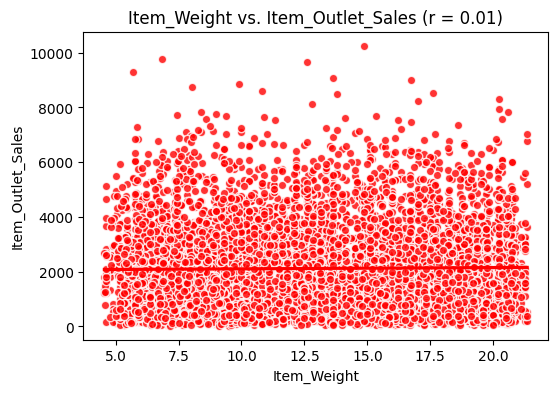

In [40]:
# Test the function with a kwarg from the regplot function
fig, ax = plot_numeric_vs_target(df, "Item_Weight", color = 'red')

No correlation between item outlet sale and item weight

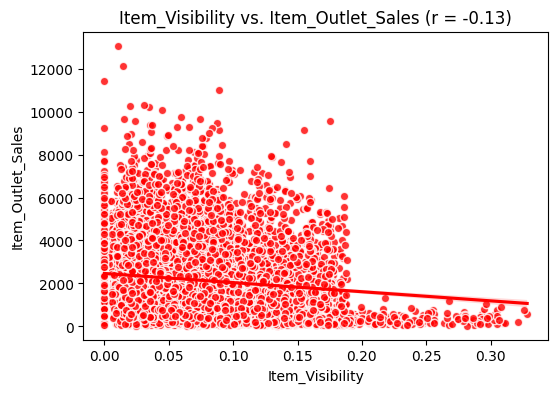

In [41]:
fig, ax = plot_numeric_vs_target(df, "Item_Visibility", color = 'red')

There is a slight negative correlation between item outlet sales and visibility

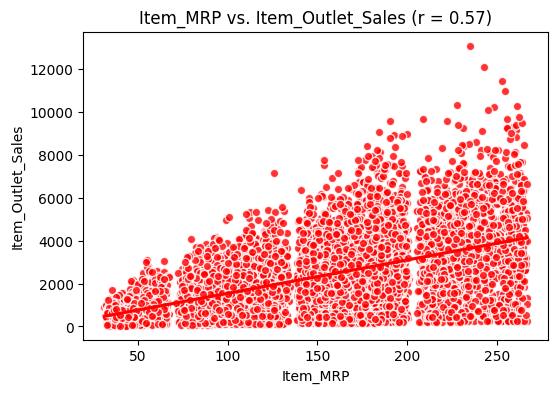

In [42]:
fig, ax = plot_numeric_vs_target(df, "Item_MRP", color = 'red')

There is a positive correlation between the outlet sales and the MRP

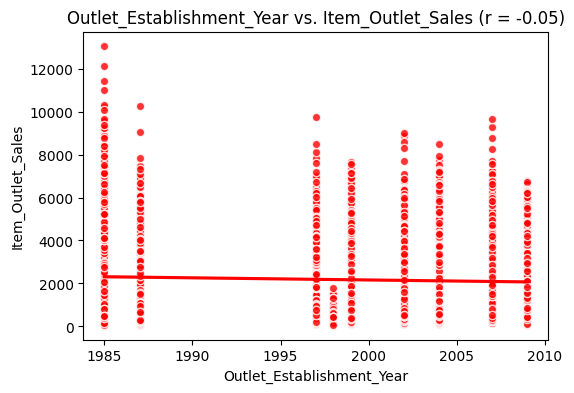

In [43]:
fig, ax = plot_numeric_vs_target(df, "Outlet_Establishment_Year", color = 'red')

No impact for the outlet est. year on the sales

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

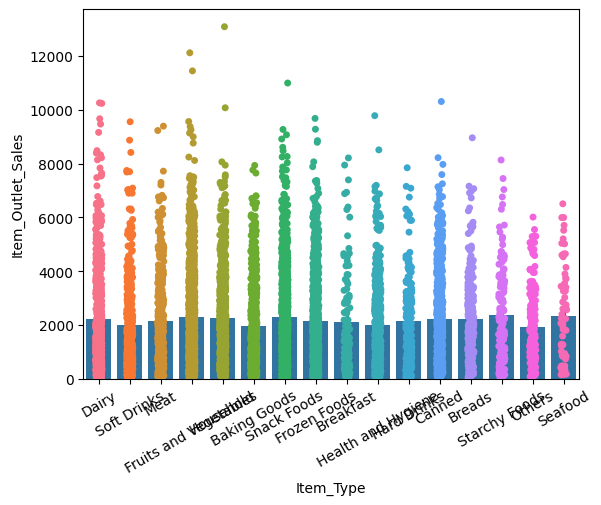

In [47]:
x= "Item_Type"
y= "Item_Outlet_Sales"
sns.barplot(data=df, x=x, y=y)
# Include the hue argument for the stripplot
sns.stripplot(data =df, x=x, y=y, hue = x);
plt.xticks(rotation=30)

No significant correlation between item type and sale outlet

([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

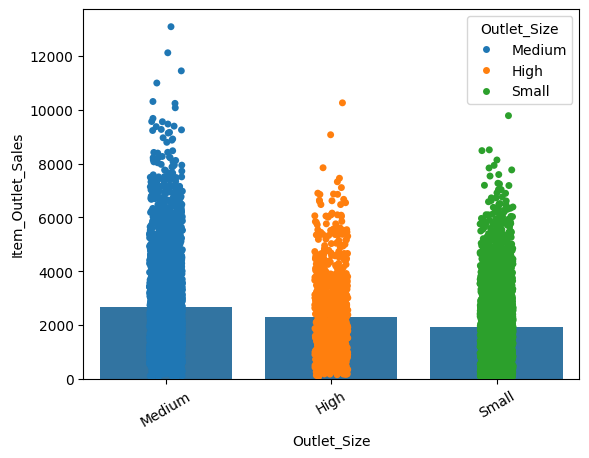

In [48]:
x= "Outlet_Size"
y= "Item_Outlet_Sales"
sns.barplot(data=df, x=x, y=y)
# Include the hue argument for the stripplot
sns.stripplot(data =df, x=x, y=y, hue = x);
plt.xticks(rotation=30)

The higher outlet sales are in the medium outlet size

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'Regular'),
  Text(2, 0, 'low fat'),
  Text(3, 0, 'LF'),
  Text(4, 0, 'reg')])

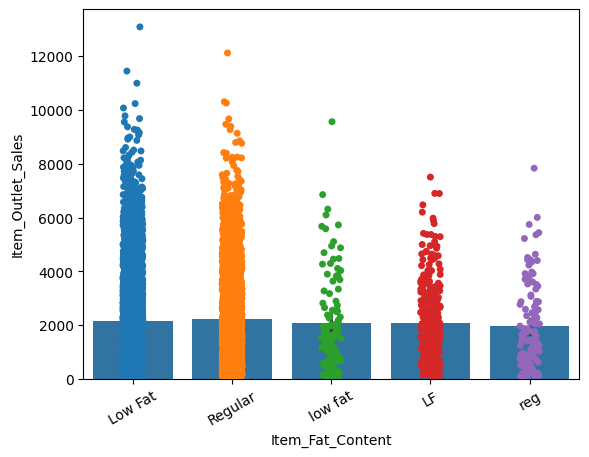

In [49]:
x= "Item_Fat_Content"
y= "Item_Outlet_Sales"
sns.barplot(data=df, x=x, y=y)
# Include the hue argument for the stripplot
sns.stripplot(data =df, x=x, y=y, hue = x);
plt.xticks(rotation=30)

No correlation between item outlet sales and items fat content

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

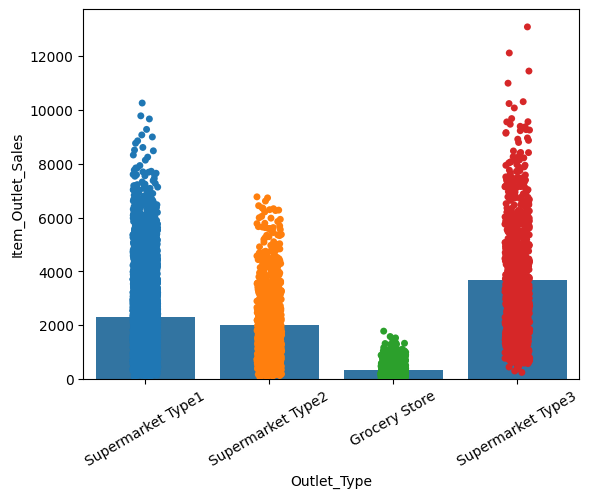

In [50]:
x= "Outlet_Type"
y= "Item_Outlet_Sales"
sns.barplot(data=df, x=x, y=y)
# Include the hue argument for the stripplot
sns.stripplot(data =df, x=x, y=y, hue = x);
plt.xticks(rotation=30)

There is a difference in the item outlet sale based on the outlet type , Supermarket type 3 noticed to have the higher item outlet sale, then type 1 and 2 and the lowest is groery store

([0, 1, 2], [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

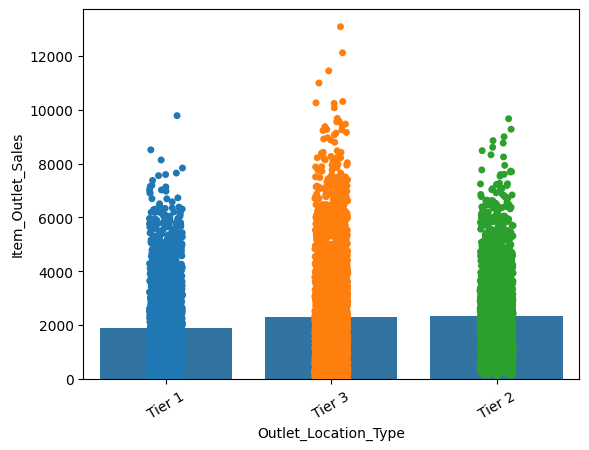

In [52]:
x= "Outlet_Location_Type"
y= "Item_Outlet_Sales"
sns.barplot(data=df, x=x, y=y)
# Include the hue argument for the stripplot
sns.stripplot(data =df, x=x, y=y, hue = x);
plt.xticks(rotation=30)

Tier 2 and 3 have equel item outet sales